In [6]:
# Import the io module from the pyspots library
from pyspots import io
# Import the numpy library. We shorten it to 'np' for easy of typing later
import numpy as np
# matploblit is the plotting library that we will use to display
# our data
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# Define the path to your Ramdog output data that you want to load
path_to_spot_data = '/home/edill/dev/martinlab/pyspots/pyspots/data/spots90FQ2_normalized_spot.dat'
# And load the data into memory
raw_spot_data = io.read_normalized_file(path_to_spot_data)

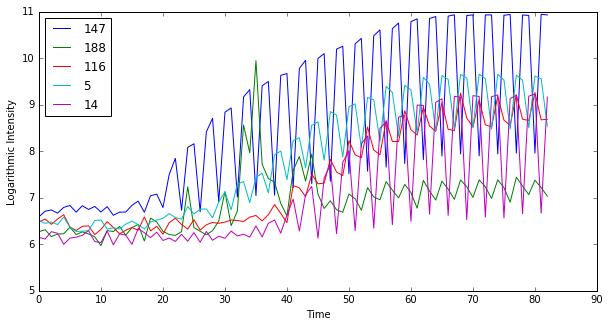

In [54]:
# Plot 15 random spots to make sure it is looking good
import random
# make a matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 5))
for _ in range(5):
    spot = random.choice(raw_spot_data)
    # use the 'plot' function on the axes object to 
    # render each spot intensity data set
    ax.plot(range(len(spot.data)), np.log(spot.data), label=spot.idx)

ax.legend(loc=0)
ax.set_xlabel('Time')
ax.set_ylabel('Logarithmic Intensity')

In [58]:
# Take the running average of one of the spots
spot = raw_spot_data[0]
data = np.asarray(spot.data)
averaged_spot_data = (data[1:-1] + data[:-2] + data[2:]) / 3


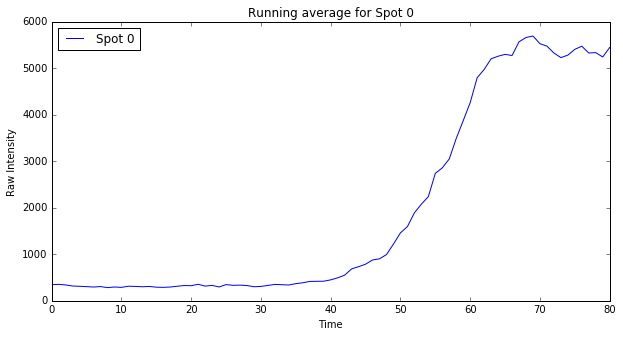

In [65]:
# and plot it to make sure it looks ok
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(len(averaged_spot_data)), averaged_spot_data, label="Spot %s" % spot.idx)
ax.set_xlabel('Time')
ax.set_ylabel('Raw Intensity')
ax.set_title("Running average for Spot %s" % spot.idx)
# loc=0 tells matplotlib to put the legend in the "best" spot which
# generally means to overlap it with as little of the data as possible
ax.legend(loc=0)

In [86]:
# define our fitting function

def avrami(t, kA, t0, n):
    return 1 - np.exp(-1*((t - t0) * kA) ** n)

In [112]:
# and now we fit it!
from lmfit import Model, Parameters

In [105]:
m = Model(avrami)

In [106]:
m.param_names

['kA', 't0', 'n']

In [117]:
params = Parameters()
params.add('kA', value=0.01, min=0)
params.add('t0', value=0)
params.add('n', value=3.0)#, fixed=True)

In [120]:
params.get('n').fixed=True

In [121]:
params

Parameters([('kA', <Parameter 'kA', 0.01, bounds=[0:inf]>),
            ('t0', <Parameter 't0', 0, bounds=[-inf:inf]>),
            ('n', <Parameter 'n', 3.0, bounds=[-inf:inf]>)])

In [94]:
t = range(len(averaged_spot_data))
fit = m.fit(averaged_spot_data, t=t, n=3, kA=0.1, t0=30)

 - Adding parameter "kA"
 - Adding parameter "t0"
 - Adding parameter "n"


In [97]:
print(fit.fit_report())

[[Model]]
    Model(avrami)
[[Fit Statistics]]
    # function evals   = 10
    # data points      = 81
    # variables        = 3
    chi-square         = 670259694.889
    reduced chi-square = 8593073.011
[[Variables]]
    kA:  -inf        +/- nan      (nan%) (init= 0.1)
    t0:  -inf        +/- nan      (nan%) (init= 30)
    n:   -inf        +/- nan      (nan%) (init= 3)
[[Correlations]] (unreported correlations are <  0.100)

